## Introduction

RFM analysis is one of the customer segmentation techniques that uses past purchasing behavior to categorize customers.
We will cluster customers to measure which ones had more propensity our campaign strategy. Also, after our analysis we could determine potential customers for future marketing decisions.

Recency: The date which is calculated by subtracting the customer's last shopping date from the analysis date.

Frequency: The total number of purchases.

Monetary: The total monetary value spend by customer.


## Importing Libraries and Reading Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Reading Dataset
df = pd.read_excel("C:/Users/bahadiroz/OneDrive - Otokoç Otomotiv Ticaret ve Sanayi A.Ş/Desktop/Bahadır/online_retail_II.xlsx")

In [3]:
#copying data frame for back up
df2= df.copy()

## EDA Analysis and Preparing Data

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
def df_summary(df):
    print("-------------------- Shape --------------------")
    print("Total number of rows: ", df.shape[0])
    print("Total number of columns: ", df.shape[1], "\n")
    print("-------------------- Columns --------------------")
    print(df.columns, "\n")
    print("-------------------- Info --------------------")
    print(df.info(), "\n")
    print("-------------------- Null Values--------------------")
    print(df.isna().sum(), "\n")
    print("-------------------- Describe --------------------")
    print(df.describe().T)
    
df_summary(df)

-------------------- Shape --------------------
Total number of rows:  525461
Total number of columns:  8 

-------------------- Columns --------------------
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object') 

-------------------- Info --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(

In [6]:
#As a habit I don't like working with column names which is contain spaces
df.rename(columns = {"Customer ID":"Customer_ID"}, inplace = True)

In [7]:
#We will drop null values
df.dropna(inplace=True)

In [8]:
#We don't want to see decimal values on Customer_ID column
df["Customer_ID"] = df["Customer_ID"].astype(int)

In [9]:
#Setting decimal digits
pd.set_option('display.float_format', lambda x:'%.2f' %x)

In [10]:
print("Number of Countries: ", df.Country.nunique())

df.Country.value_counts().head(10)

Number of Countries:  37


United Kingdom     379423
EIRE                 8710
Germany              8129
France               5710
Netherlands          2769
Spain                1278
Switzerland          1187
Belgium              1054
Portugal             1024
Channel Islands       906
Name: Country, dtype: int64

In [11]:
print("Number of customers: ", df["Customer_ID"].nunique())

Number of customers:  4383


In [12]:
print("Number of unique items: ",df.StockCode.nunique())

#top5 most purchased items

df.groupby(["StockCode", "Description"]).agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

Number of unique items:  4031


,,Quantity
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,55861
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54274
17003,BROCADE RING PURSE,47430
21212,PACK OF 72 RETRO SPOT CAKE CASES,44507
84879,ASSORTED COLOUR BIRD ORNAMENT,44120


In [13]:
#We have retured orders in our dataset. Let's revome them
df = df[~df["Invoice"].str.contains("C", na=False)]

## Calculating RFM Metrics 

In [14]:
#Creating TotaL_Price column
df["Total_Price"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50


In [15]:
#We will set analysis date as a week after last transaction was made by.
analysis_date = df["InvoiceDate"].max() + timedelta(days=7)
analysis_date


Timestamp('2010-12-16 20:01:00')

In [16]:
#Recency
recency = df.groupby("Customer_ID").agg({"InvoiceDate": lambda InvoiceDate: (analysis_date - InvoiceDate.max()).days})
recency.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
recency.head()

,Recency
Customer_ID,
12346,171
12347,9
12348,80
12349,49
12351,17


In [17]:
#Frequency
frequency = df.groupby(["Customer_ID"]).agg({"InvoiceDate":"nunique"})
frequency.rename(columns = {"InvoiceDate": "Frequency"}, inplace = True)
frequency.head()

,Frequency
Customer_ID,
12346,11
12347,2
12348,1
12349,3
12351,1


In [18]:
#Monetary
monetary = df.groupby("Customer_ID").agg({"Total_Price":"sum"})
monetary.rename(columns = {"Total_Price": "Monetary"}, inplace = True)
monetary.head()

,Monetary
Customer_ID,
12346,372.86
12347,1323.32
12348,222.16
12349,2671.14
12351,300.93


In [19]:
#Creating RFM Table
rfm_table = pd.concat([recency, frequency, monetary], axis=1)
rfm_table

,Recency,Frequency,Monetary
Customer_ID,,,
12346,171,11,372.86
12347,9,2,1323.32
12348,80,1,222.16
12349,49,3,2671.14
12351,17,1,300.93
...,...,...,...
18283,24,6,641.77
18284,73,1,461.68
18285,302,1,427.00


In [20]:
#Calculating rfm scores
rfm_table["Recency_Score"] = pd.qcut(rfm_table['Recency'], 5, [5, 4, 3, 2, 1])
rfm_table["Frequency_Score"] = pd.qcut(rfm_table['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_table["Monetary_Score"] = pd.qcut(rfm_table['Monetary'], 5, [1, 2, 3, 4, 5])   
rfm_table

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
Customer_ID,,,,,,
12346,171,11,372.86,2,5,2
12347,9,2,1323.32,5,2,4
12348,80,1,222.16,2,1,1
12349,49,3,2671.14,3,3,5
12351,17,1,300.93,5,1,2
...,...,...,...,...,...,...
18283,24,6,641.77,4,5,3
18284,73,1,461.68,3,2,2
18285,302,1,427.00,1,2,2


In [21]:
rfm_table["RFM_Score"] = (rfm_table['Recency_Score'].astype(str) + 
                          rfm_table['Frequency_Score'].astype(str) +
                          rfm_table['Monetary_Score'].astype(str))
rfm_table

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
Customer_ID,,,,,,,
12346,171,11,372.86,2,5,2,252
12347,9,2,1323.32,5,2,4,524
12348,80,1,222.16,2,1,1,211
12349,49,3,2671.14,3,3,5,335
12351,17,1,300.93,5,1,2,512
...,...,...,...,...,...,...,...
18283,24,6,641.77,4,5,3,453
18284,73,1,461.68,3,2,2,322
18285,302,1,427.00,1,2,2,122


In [22]:
#Creating Segment levels
rfm_table['Segment'] = (rfm_table['Recency_Score'].astype(str) + 
                        rfm_table['Frequency_Score'].astype(str))
rfm_table

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
Customer_ID,,,,,,,,
12346,171,11,372.86,2,5,2,252,25
12347,9,2,1323.32,5,2,4,524,52
12348,80,1,222.16,2,1,1,211,21
12349,49,3,2671.14,3,3,5,335,33
12351,17,1,300.93,5,1,2,512,51
...,...,...,...,...,...,...,...,...
18283,24,6,641.77,4,5,3,453,45
18284,73,1,461.68,3,2,2,322,32
18285,302,1,427.00,1,2,2,122,12


In [23]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [24]:
#We will set segment names
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)
rfm_table

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
Customer_ID,,,,,,,,
12346,171,11,372.86,2,5,2,252,Cant_Loose
12347,9,2,1323.32,5,2,4,524,Potential_Loyalists
12348,80,1,222.16,2,1,1,211,Hibernating
12349,49,3,2671.14,3,3,5,335,Need_Attention
12351,17,1,300.93,5,1,2,512,New_Customers
...,...,...,...,...,...,...,...,...
18283,24,6,641.77,4,5,3,453,Loyal_Customers
18284,73,1,461.68,3,2,2,322,About_to_Sleep
18285,302,1,427.00,1,2,2,122,Hibernating


In [25]:
#Let's check results
rfm_table.Segment.value_counts(ascending=False).to_frame()

,Segment
Hibernating,1016
Loyal_Customers,743
Champions,663
At_Risk,611
Potential_Loyalists,516
About_to_Sleep,343
Need_Attention,207
Promising,87
Cant_Loose,78
New_Customers,50


Our segmentation graph is going to be look like something below;

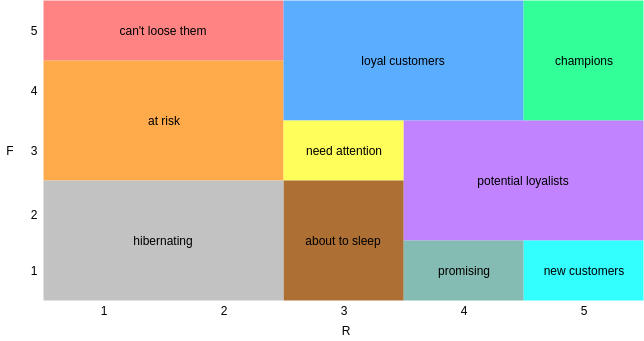

In [26]:
#Let's dig a little deeper into categories
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About_to_Sleep        59.85   343      1.20   343   442.27   343
At_Risk              157.93   611      3.07   611  1188.21   611
Cant_Loose           129.72    78      9.04    78  4072.97    78
Champions             13.12   663     12.50   663  6852.26   663
Hibernating          220.31  1016      1.13  1016   401.98  1016
Loyal_Customers       42.28   743      6.82   743  2743.48   743
Need_Attention        59.21   207      2.45   207  1058.79   207
New_Customers         14.58    50      1.00    50   386.20    50
Potential_Loyalists   24.77   516      2.02   516   729.16   516
Promising             31.76    87      1.00    87   368.02    87

## Conclusion

In this notebook we worked with e-commerce data and tried a clustering customers ten different segments based on their purchasing history. Analysis gives us a clear view of the status of our current customers. 

In today's world where every decision is based on data as much as possible, the RFM segmentation technique offers a useful perspective to decision makers in the field of marketing analytics. Of course, depending on the industry and the product we sold, we can develop different perspectives. I really would like to know your comments, thanks for reading :)